In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:

# Load the model
model = tf.keras.models.load_model("models/flowers_model.h5")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

1/1 [==============================] - 0s 143ms/step
(32,)


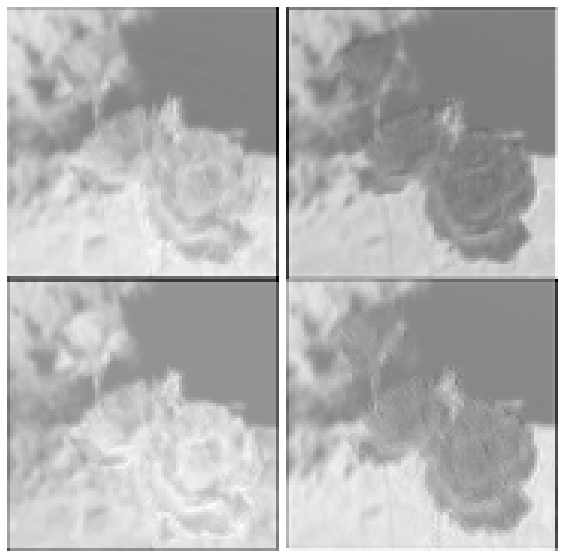

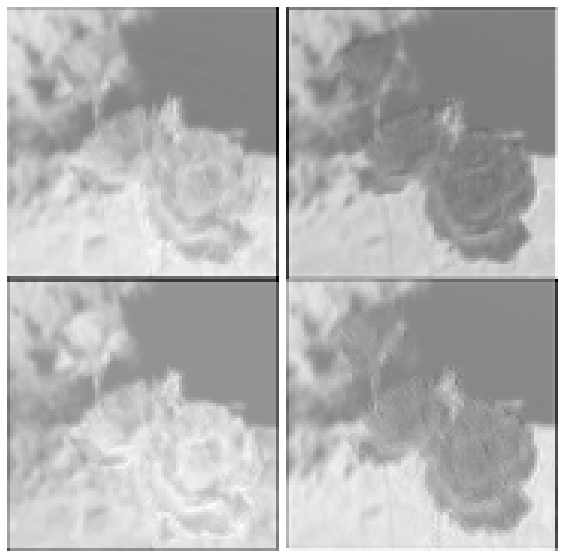

In [31]:


# Get the feature map of a specific layer
feature_map = model.get_layer("conv2d_7").output

# Create a new model that outputs the feature map
feature_map_model = tf.keras.Model(inputs=model.inputs, outputs=feature_map)

# Input image to get feature maps for
img = tf.keras.preprocessing.image.load_img("flower_photo/roses/563847503_89e9756c80.jpg", target_size=(180, 180))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis, ...])

# Get the feature maps
feature_maps = feature_map_model.predict(x)

# Plot the feature maps

# for i in range(feature_maps.shape[-1]):
#     if feature_maps[0, :, :, i].max() == 0:
#         continue
#     plt.imshow(feature_maps[0, :, :, i], cmap="gray")
#     plt.show()

# choose the first 3 feature maps with the highest sum value
feature_maps = feature_maps[0, :, :, :]
print(feature_maps.sum(axis=(0, 1)).shape)
feature_maps_ = feature_maps.reshape(feature_maps.shape[0] * feature_maps.shape[1], feature_maps.shape[2])
feature_maps_ = feature_maps_.sum(axis=0)
feature_maps_indexs = feature_maps_.argsort()[-4:][::-1]
feature_maps = feature_maps[:, :, feature_maps_indexs]
# print(feature_maps)
# Plot the feature maps and sticks to 2x2 grid
plt.figure(figsize=(10, 10))
for i in range(feature_maps.shape[-1]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

# convert code above to fig object
fig = plt.figure(figsize=(10, 10)) 
for i in range(feature_maps.shape[-1]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()  
fig.savefig('test.png')